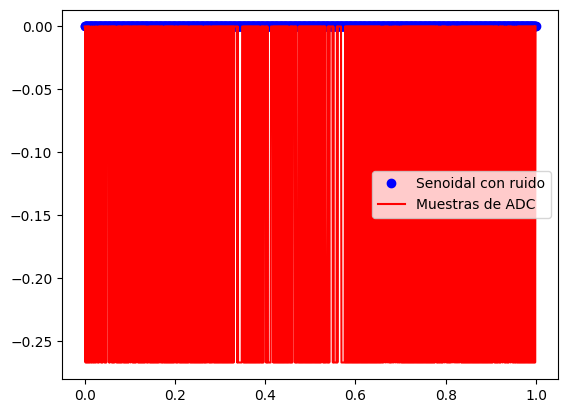

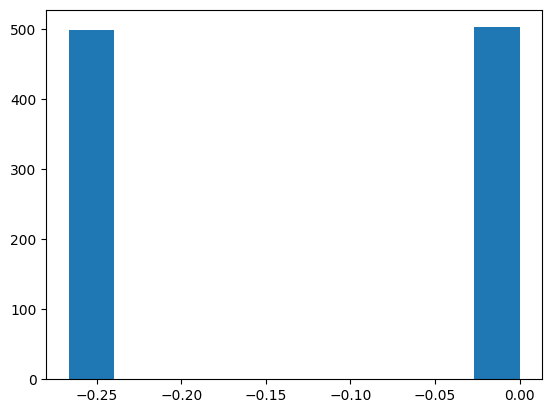

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 14 17:36:12 2022

@author: Guillermo Daniel Spagnolo
         daniespagnolo@frba.utn.edu.ar
"""
#TS3: Simulación de un ADC (cuantización) parte 1/2

# Simularemos el comportamiento de un ADC y cómo sus parámetros, tamaño de palabra de B bits y frecuencia de muestreo fs afectan a una señal (aproximadamente) analógica.

# Para ello se puede analizar una senoidal con los siguientes parámetros:

# frecuencia f0 arbitraria, por ejemplo f0=fS/N=Δf, 
# Amplitud normalizada, es decir unitaria
# Se pide diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo sR, de forma tal que para un ADC de B bits y rango ±VF, el operador.
import numpy as np
import matplotlib.pyplot as plt
# import muestreoSenoidal.py
from numpy.fft import fft

def mi_funcion_sen( vmax , dc , ff, ph, nn , fs ):#funcion senoidal 

    ts = 1/fs
    tt = np.linspace(0,(N-1)*ts,nn) #0 a (N-1)*Ts)

    #tt = np.linspace(0,2*np.pi,num=nn)
    xx = dc + vmax*np.sin(2*np.pi*ff*tt + ph)
    return (tt, xx)
N  = 1000#         cant. muestras
fs = 1000 #Hz#  frec muestreo

freq_señal = 500 

Amax=1#amplitud Normalizada
ph=0
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

#----ADC
B1 = 4# Bits size que tiene la palabra
B2 = 8# Bits size que tiene la palabra
B3 = 16# Bits size que tiene la palabra

coefDeCargaADC = 0.8
Vf = 2
# ----------------------

[tt,x1] = mi_funcion_sen(vmax = Amax, dc = 0, ff = freq_señal, ph=ph, nn = N, fs = fs)
x = coefDeCargaADC*x1

####cuantizacion
q = (2*Vf)/((2**B1)-1)#LSB analogico
# Xq= np.round(x1)/q ##si utilizo esto, me redondea a 0
Xq= (x1//q) 
Xq = Xq*q           

plt.close("all")
plt.figure()
plt.plot(tt, x, 'bo')
plt.plot(tt, Xq, 'r')
plt.legend(['Senoidal con ruido','Muestras de ADC'])
plt.show()


# sQ=np.roud(x1)/Q#se cambia la escala de la señal
# YY=yy*Q
# e=sQ*Q − sR;
# plt.hist(Xq);



error = Xq-x
media = np.mean(error)
varianza = np.var(error)

plt.figure()
plt.hist(error)
plt.show()

